

## **Motivation**:

1. Predicting Thermodynamic Stability (IS2RES)
The primary chemical goal is to predict the Relaxed Energy (**y_relaxed**) of the system.
    * *Purpose*: This value is used to calculate Adsorption Energy
<br>

2. Predicting Atomic Geometry (IS2RES)
The structural goal is to predict the Relaxed Positions (**pos_relaxed**) of the atoms.
    * *Purpose*: In the real world, atoms move to find a "local energy minimum". This task challenges models to predict exactly where the atoms will settle (the equilibrium structure) given only their starting positions.

<br>

## **Dataset information**
Each Data object includes the following information for each corresponding system (assuming K atoms):

* `sid` - [1] System ID corresponding to each structure
* `edge_index` - [2 x  J] Graph connectivity with index 0 corresponding to neighboring atoms and index 1 corresponding to center atoms. J corresponds to the total edges as determined by a nearest neighbor search.
* `atomic_numbers` - [K x 1] Atomic numbers of all atoms in the system
* `pos` - [K x 3] Initial structure positional information of all atoms in the system (x, y, z cartesian coordinates)
* `natoms` - [1] Total number atoms in the system
* `cell` -  [3  x 3] System unit cell (necessary for periodic boundary condition (PBC) calculations)
* `cell_offsets` - [J x 3] offset matrix where each index corresponds to the unit cell offset necessary to find the corresponding neighbor in  `edge_index`. For example,  `cell_offsets[0, :] = [0,1,0]` corresponds to `edge_index[:, 0]= [1,0]` representing node 1 as node 0’s neighbor located one unit cell over in the +y direction.
* `tags` - [K x 1] Atomic tag information: 0 - Fixed, sub-surface atoms, 1 - Free, surface atoms 2 - Free, adsorbate atoms

Train/Val LMDBs additionally contain the following attributes:

* `y_init` - [1] Initial structure energy of the system
* `y_relaxed` - [1] Relaxed structure energy of the system (Energy distribution)
* `pos_relaxed` - [K x 3] Relaxed structure positional information of all atoms in the system (x, y, z cartesian coordinates)


*This LMDB file requires no additional processing and is ready to be used directly with the repository’s Datasets and DataLoaders.*


## Libraries

In [28]:
import importlib
import modules.understand_data
import modules.handle_data
import modules.chemical_eda

importlib.reload(modules.understand_data)
importlib.reload(modules.handle_data)
importlib.reload(modules.chemical_eda)

<module 'modules.chemical_eda' from '/home/jepazminoc/h2-catalyst-ml/modules/chemical_eda.py'>

In [29]:
from modules.understand_data import *
from modules.handle_data import load_df_data, load_ocp_dataset
from modules.chemical_eda import perform_chemical_eda

In [30]:
dataset_path = '../data/is2res_train_val_test_lmdbs/data/is2re/10k/train/data.lmdb'

## Load dataset

In [31]:
data_df = load_df_data(dataset_path, None)
data_df.head()

































Loading OCP Tensors:   0%|          | 0/10000 [00:18<?, ?it/s]
























































































































































































Loading data: 100%|██████████| 10000/10000 [00:05<00:00, 1758.36it/s]


,x,edge_index,edge_attr,pos,norm,face,cell,atomic_numbers,natoms,cell_offsets,force,distances,fixed,sid,tags,y_init,y_relaxed,pos_relaxed
0,None,"[[69, 83, 75, 35, 43, 37, 39, 5, 56, 45, 58, 2...",None,"[[7.0255556, 0.0, 12.73459], [6.9654884, 10.95...",None,None,"[[[11.832515, 0.0, -0.026398], [-3.0482295, 16...","[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13....",86,"[[0, -1, 0], [0, 0, 0], [0, -1, 0], [0, -1, 0]...","[[0.07672916, 0.03236759, 0.5780765], [0.03831...","[2.811749, 2.811749, 2.811749, 2.8439174, 2.84...","[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",2472718,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...",6.282501,-0.025550,"[[7.0255556, 0.0, 12.73459], [6.872939, 10.890..."
1,None,"[[55, 63, 52, 48, 38, 33, 34, 15, 7, 4, 8, 3, ...",None,"[[5.3127055, 11.384256, 12.790607], [5.3127055...",None,None,"[[[12.750493, 0.0, 0.0], [3.1876233, 13.427562...","[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40....",85,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[-0.4060113, -0.16628616, -0.05275416], [-0.2...","[2.1678982, 2.1678982, 2.1678982, 2.198441, 2....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",1747243,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...",5.972082,-1.837069,"[[5.3127055, 11.384256, 12.790607], [5.3127055..."
2,None,"[[43, 88, 48, 59, 89, 38, 42, 35, 1, 20, 84, 3...",None,"[[0.47911805, 9.925274, 17.310055], [3.051076,...",None,None,"[[[14.120776, 0.0, -0.0], [-0.0, 20.132154, -1...","[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19....",114,"[[0, 0, 0], [-1, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0.10013931, -0.03330279, 0.13222352], [0.040...","[3.5385437, 3.5449479, 3.6219482, 3.6975377, 3...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",1372820,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.497210,-0.423333,"[[0.6374, 9.757039, 17.570086], [3.051076, 10...."
3,None,"[[33, 60, 37, 40, 57, 52, 46, 9, 24, 30, 6, 4,...",None,"[[5.9132943, 5.589967, 15.358818], [2.5504537,...",None,None,"[[[13.451364, 0.0, -0.0], [-0.0, 8.205255, -0....","[44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44....",67,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0.10401902, -0.12071106, 0.28067988], [-0.22...","[2.4056926, 2.4337132, 2.4337134, 2.4337134, 2...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",504664,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...",9.608648,2.931869,"[[5.9132943, 5.589967, 15.358818], [2.5504537,..."
4,None,"[[38, 50, 36, 49, 43, 44, 55, 39, 7, 19, 5, 17...",None,"[[3.8807034, 2.665027, 15.419543], [0.0, 0.0, ...",None,None,"[[[11.642111, 0.0, -0.0], [3.8807034, 7.995081...","[23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23....",76,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0.01171777, 0.02433683, -0.2262483], [0.0031...","[2.6693335, 2.6693335, 2.6693335, 2.6693335, 2...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",592368,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",6.556396,-1.105795,"[[3.8807034, 2.665027, 15.419543], [0.0, 0.0, ..."


In [32]:
data_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               0 non-null      object 
 1   edge_index      10000 non-null  object 
 2   edge_attr       0 non-null      object 
 3   pos             10000 non-null  object 
 4   norm            0 non-null      object 
 5   face            0 non-null      object 
 6   cell            10000 non-null  object 
 7   atomic_numbers  10000 non-null  object 
 8   natoms          10000 non-null  int64  
 9   cell_offsets    10000 non-null  object 
 10  force           10000 non-null  object 
 11  distances       10000 non-null  object 
 12  fixed           10000 non-null  object 
 13  sid             10000 non-null  int64  
 14  tags            10000 non-null  object 
 15  y_init          10000 non-null  float64
 16  y_relaxed       10000 non-null  float64
 17  pos_relaxed     10000 non-null  object 
dty

## Understanding Data

I need to know what I have in each row. I know that there are vectors, but I need a visual representation to have a better idea.
So what I'm doing is creating a visual representation of two samples. 

### CPK color scheme:

- Red = Oxygen
- White = Hydrogen
- Grey = Carbon
- Blue = Nitrogen
- Orange/Brown = Copper, etc. (Metals have their own specific colors).

--- Comparing Samples 0 and 1 ---
Attribute                 | Sample 0                       | Sample 1                      
------------------------------------------------------------------------------------------
Formula                   | HAl60NRh24                     | C2HN32O2Se16Zr32              
Energy (eV)               | -0.0256                        | -1.8371                       
Total Atoms               | 86                             | 85                            
Adsorbate Atoms           | 55                             | 40                            




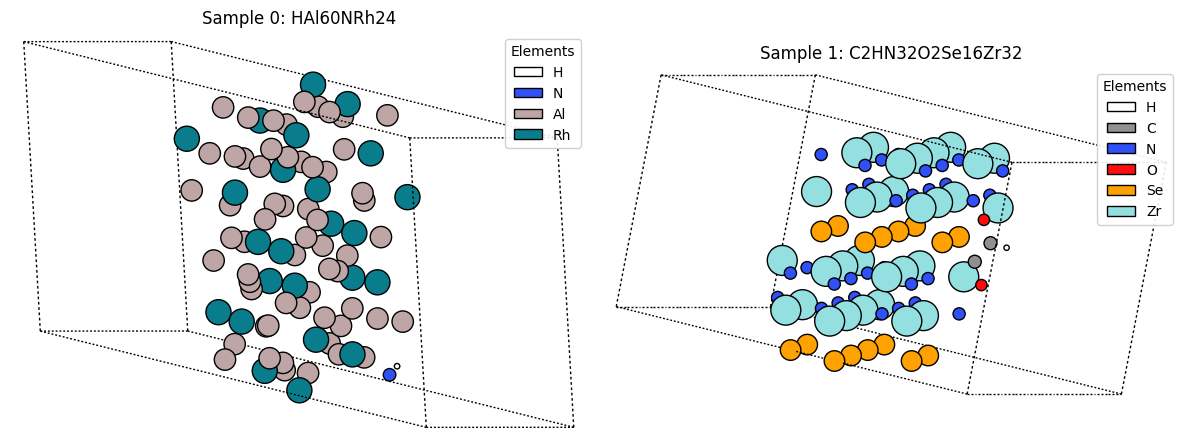

In [33]:
compare_samples(dataset_path, 0, 1)

## **EDA**

**1.- Chemical & Distribution Analysis**
Here is where I understand what is being simulated, basically there are three aspects:
* *Elemental Diversity:* Visualize the frequency of metals in the catalysts versus elements in the adsorbates (H, C, N, O).
* *System Scaling:* Plot the distribution of natoms per system.
* *Tag distribution:* Calculate the ratio of Fixed (0) vs. Free (1, 2) atoms. This tells you how much of the system is actually "moving" during the simulated relaxation.


**Summary:** In this phase, I need to verify the diversity of the catalysts and adsorbates to understand the domain of the model. We will specifically look at the Atomic Number distributions, map them to chemical symbols, and analyze the Tag system (Adsorbate vs. Surface vs. Subsurface).

In [ ]:
pt_tensor = load_ocp_dataset(dataset_path)

Loading OCP Tensors: 100%|██████████| 10000/10000 [00:05<00:00, 1822.62it/s]


Starting EDA on 10000 samples...


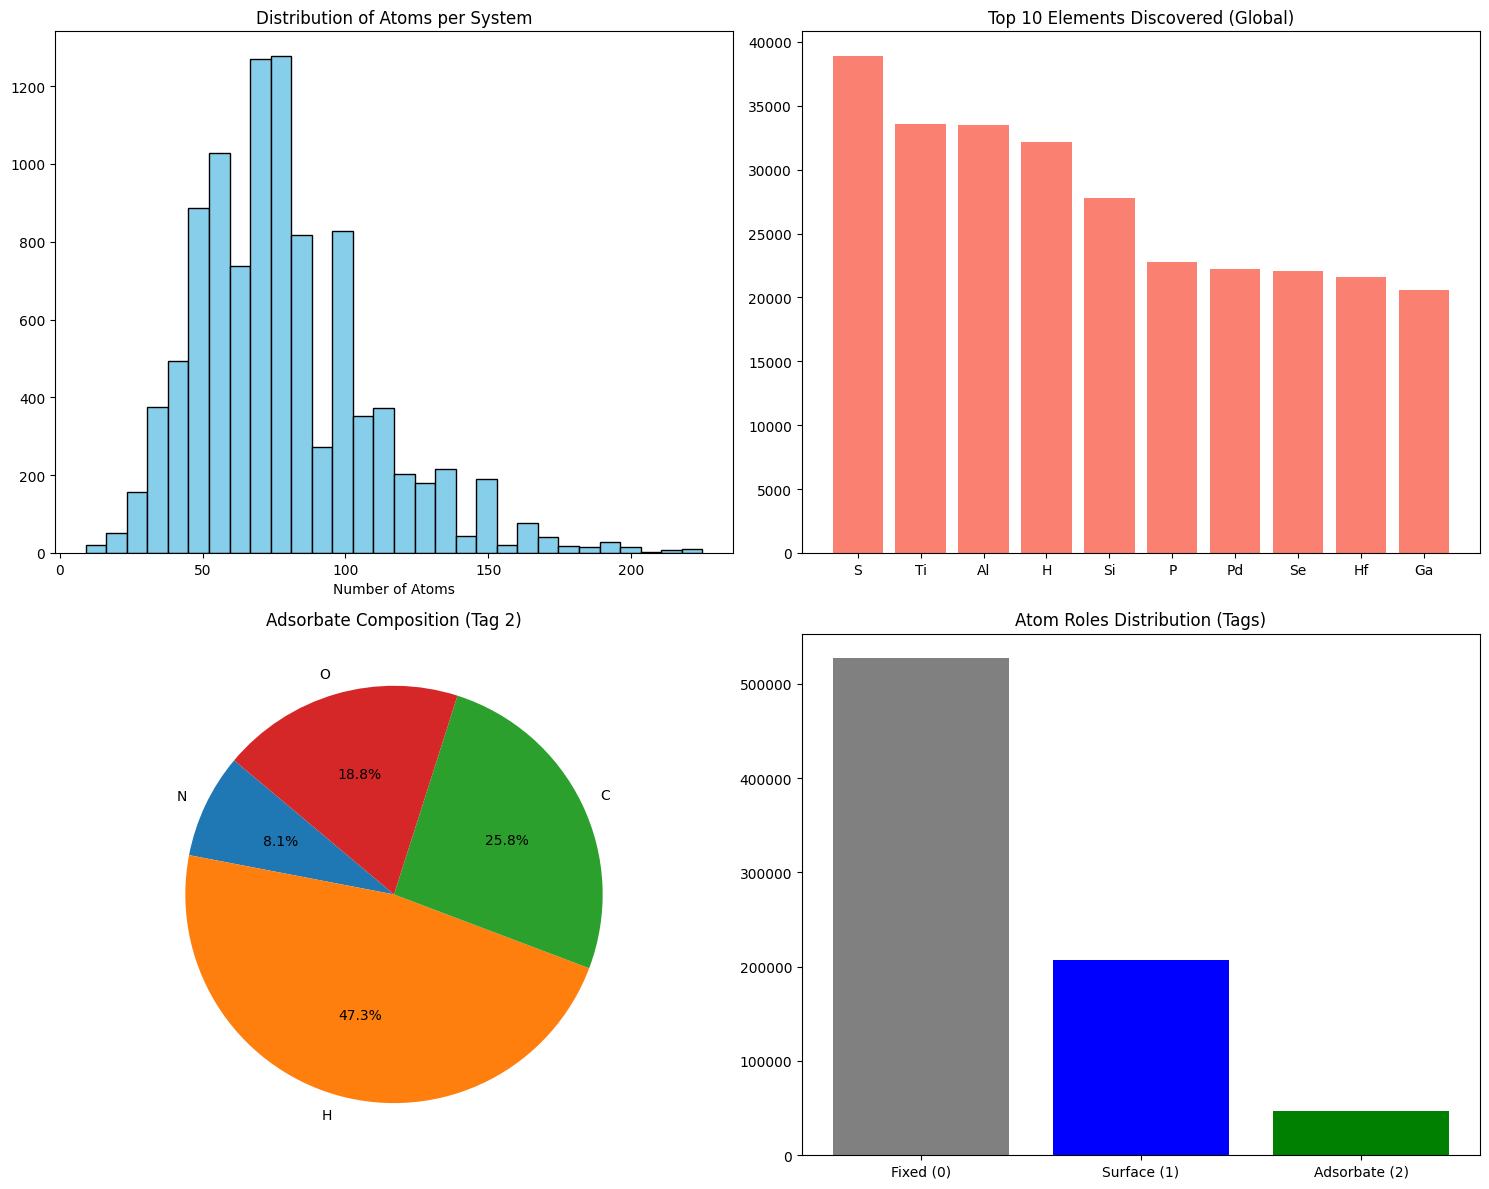


--- EDA Summary ---
Total systems analyzed: 10000
Avg atoms/system: 78.08 (Min: 9, Max: 225)
Elements present: Ag, Al, As, Au, B, Bi, C, Ca, Cd, Cl, Co, Cr, Cs, Cu, Fe, Ga, Ge, H, Hf, Hg, In, Ir, K, Mn, Mo, N, Na, Nb, Ni, O, Os, P, Pb, Pd, Pt, Rb, Re, Rh, Ru, S, Sb, Sc, Se, Si, Sn, Sr, Ta, Tc, Te, Ti, Tl, V, W, Y, Zn, Zr


In [35]:
perform_chemical_eda(pt_tensor)